Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy: 0.9649122807017544


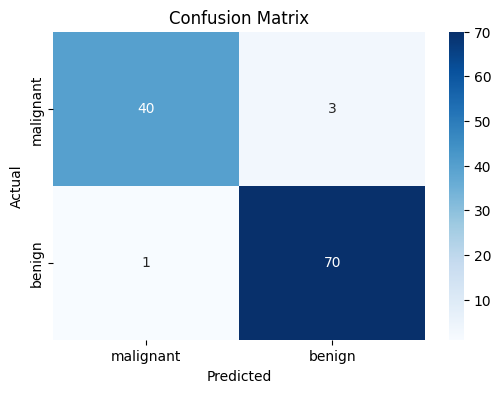

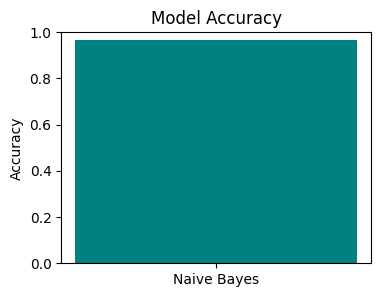

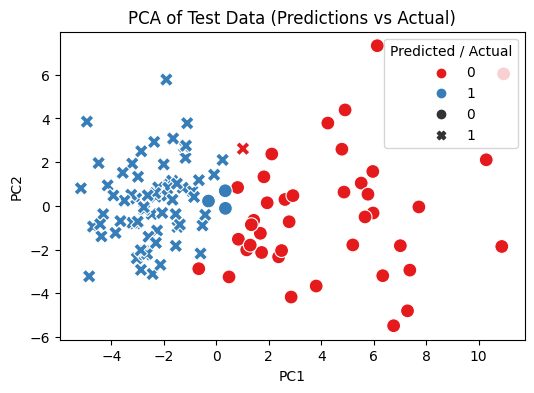

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

# Load predefined dataset (you can switch between datasets here)
data = datasets.load_breast_cancer()  # You can also try: load_iris(), load_wine()

# Convert to DataFrame
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Naive Bayes Classifier
model = GaussianNB()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluation
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

print("Classification Report:\n", report)
print("Accuracy:", acc)

# --- Visualization ---

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy Bar
plt.figure(figsize=(4, 3))
plt.bar(['Naive Bayes'], [acc], color='teal')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

# PCA for 2D Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_scaled)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_pred, palette='Set1', style=y_test, s=100)
plt.title('PCA of Test Data (Predictions vs Actual)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title="Predicted / Actual")
plt.show()
